In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [231]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


<Axes: xlabel='Heart Disease', ylabel='count'>

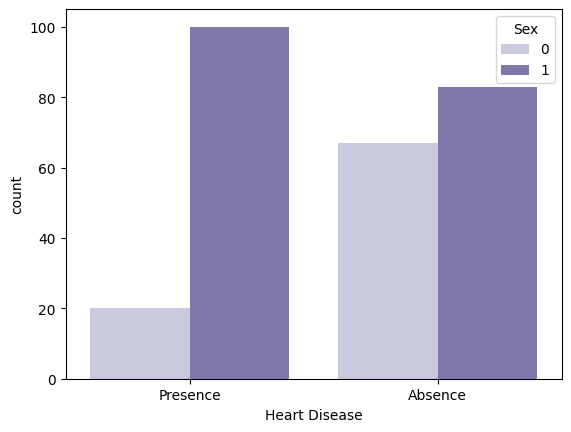

In [232]:
sns.countplot(x=data['Heart Disease'],hue='Sex',data=data, palette = "Purples")

<Axes: xlabel='Heart Disease', ylabel='count'>

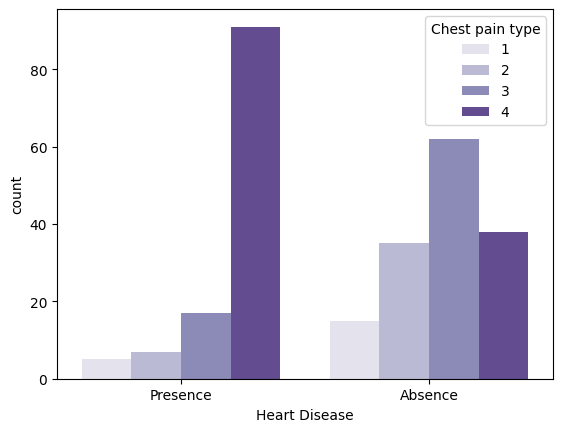

In [233]:
sns.countplot(x=data['Heart Disease'],hue='Chest pain type',data=data, palette = "Purples")

# Data Preprocessing

In [234]:
# Creaiamo un dizionario personalizzato che mappa i valori della colonna 'Heart Disease' con i valori numerici 0 e 1
heart_disease_mapping = {
    'Absence': 0,
    'Presence': 1
}
# Utilizzare il metodo map() per convertire la variabile 'Heart Disease' utilizzando il dizionario 'heart_disease_mapping'
data['Heart Disease Codes'] = data['Heart Disease'].map(heart_disease_mapping)
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease Codes
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,0


In [235]:
# Eliminiamo la colonna 'Heart Desease' 
data_new = data.drop('Heart Disease', axis=1)
data_new.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Codes
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [236]:
# Verifichiamo se ci sono dei valori nulli
# La funziona sum calcola il numero di valori mancanti per ogni colonna
data_new.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease Codes        0
dtype: int64

In [237]:
# Verifichiamo se ci sono dei valori duplicati 
data_new.duplicated().sum()

0

# Data visualization

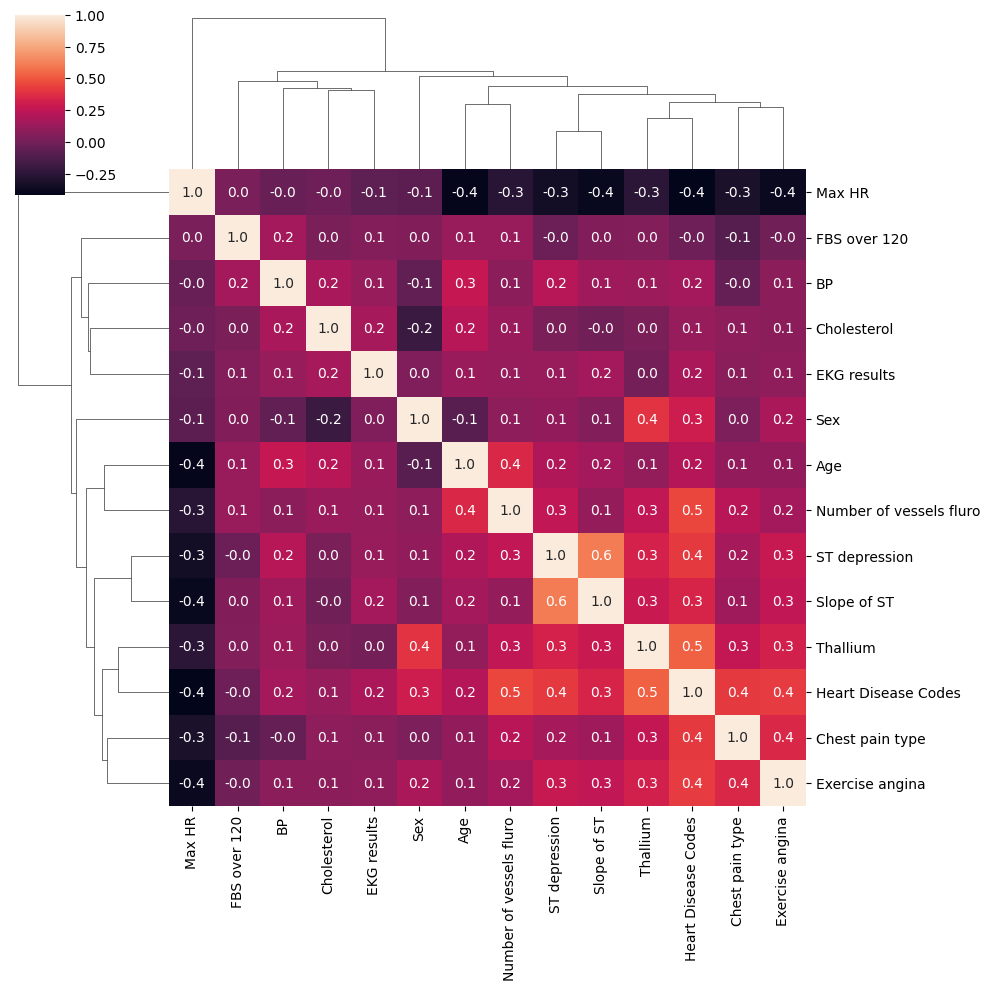

In [238]:

sns.clustermap(data_new.corr(numeric_only=True), annot=True, fmt='.1f')

In [239]:
features = data_new.columns.tolist()
features

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease Codes']

# Ricerca outliers

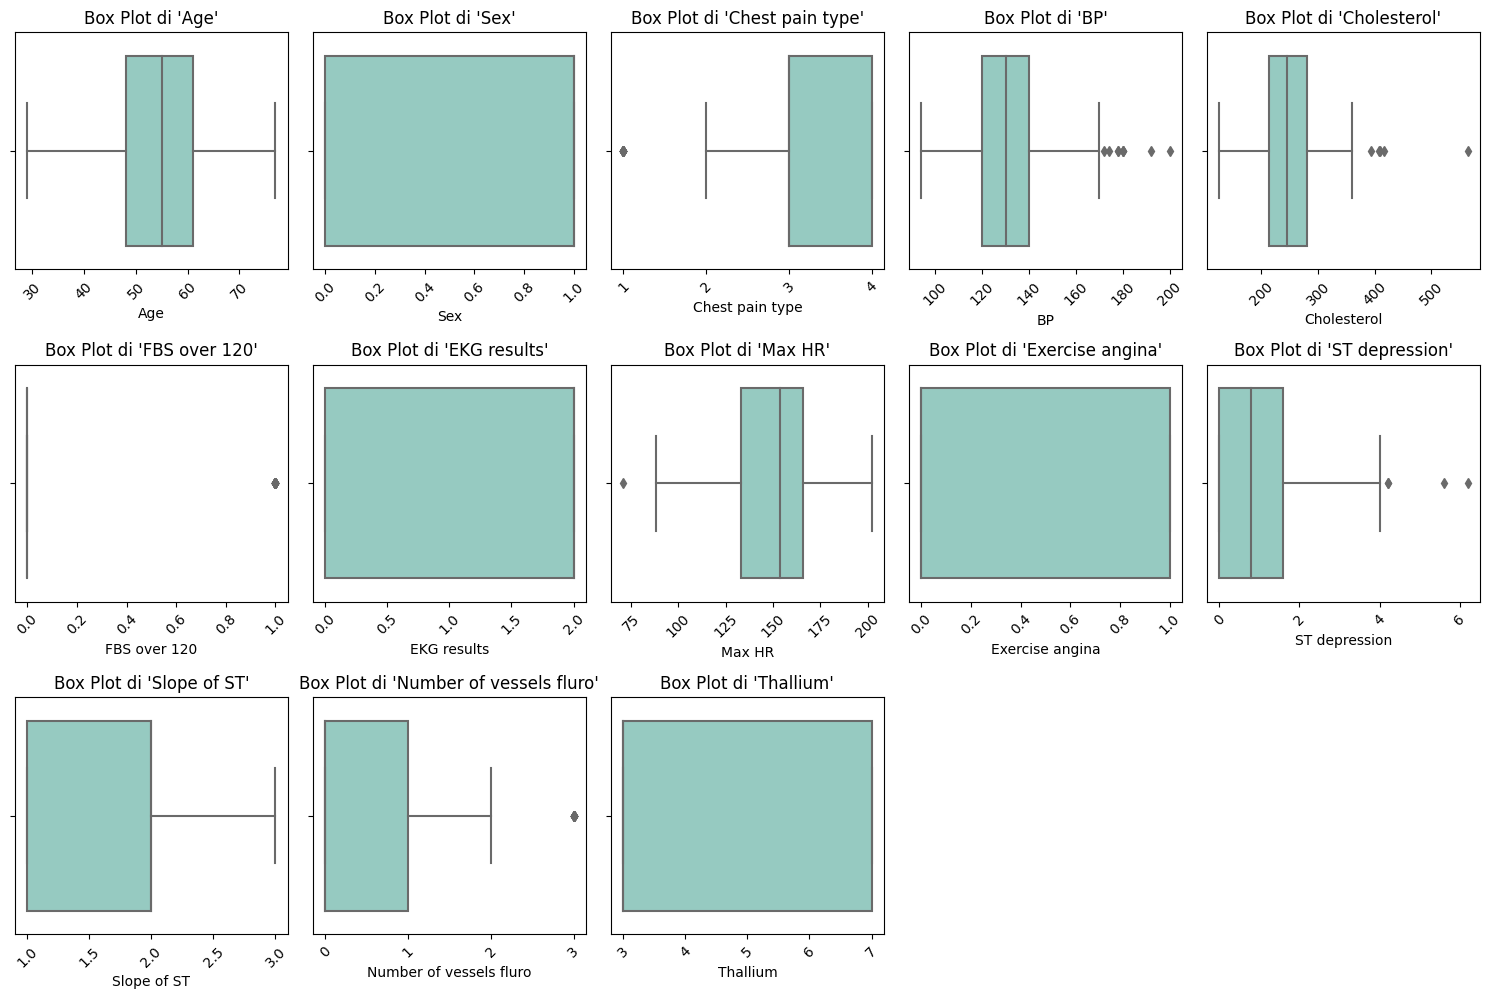

In [240]:
features = data_new.drop('Heart Disease Codes',axis=1).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)  # Crea una griglia 3x5 di subplot
    sns.boxplot(x=feature, data=data_new, palette='Set3')  # Box plot per la feature corrente
    plt.title(f"Box Plot di '{feature}'")
    plt.xticks(rotation=45)  # Ruota le etichette sull'asse x 

plt.tight_layout()  # Per evitare sovrapposizioni di subplot
plt.show()

In [241]:
lof = LocalOutlierFactor(n_neighbors=20) # 20 indica il numero di vicini da utilizzare per calcolare il fattore di outlier per ogni campione
data_new['lof_score'] = lof.fit_predict(data_new[features]) # Viene calcolato il LOF per tutte le righe utilizzando le feature specificate in 'features'

# Selezioniamo tutte le righe dove il LOF è uguale a -1, che sono le righe che rappresentano gli outlier
outliers = data_new[data_new['lof_score'] == -1]

# Stampiamo il numero di outlier trovati e gli indici delle righe corrispondenti nel dataset
print(f"Trovati {len(outliers)} outliers agli indici {outliers.index.tolist()}")

# Eliminiamo la colonna 'lof_scores'
data_new.drop('lof_score', axis=1, inplace=True) 

Trovati 8 outliers agli indici [1, 9, 52, 60, 100, 144, 181, 188]


In [242]:
data_new = data_new.drop([1, 9, 52, 60, 100, 144, 181, 188]) 

# Train-Test Split

In [243]:
# Eliminiamo la colonna 'Heart Disease Codes' dal dataset
x = data_new.drop('Heart Disease Codes', axis=1)

# e la impostiamo come variabile target
y = data_new['Heart Disease Codes']

In [244]:
# Separiamo i dati del dataset per creare il training set e il test set.
# Utilizziamo il 20% dei dati come test set e il restante 80% come training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

# X_train e y_train contengono le feature e il target del training set
# X_test e y_test contengono le feature e il target del test set
# Il parametro random_state=22 consente di fissare un valore di seme (seed) per la generazione casuale della suddivisione, 
# in modo da ottenere una suddivisione riproducibile ogni volta che il codice viene eseguito con lo stesso valore di random_state.

# Training del modello con LASSO

In [245]:
# Addestriamo il modello con LASSO con cross-validation per la selezione del parametro alpha
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

# Valutazione del modello con LASSO

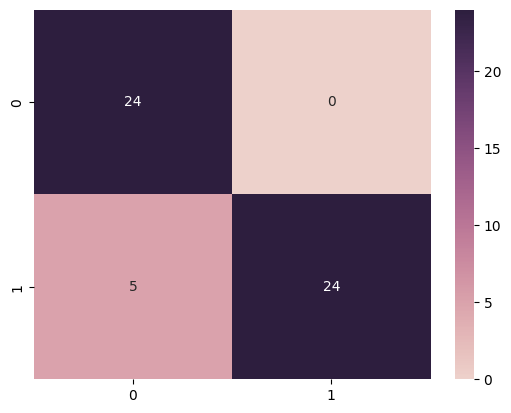

In [246]:
y_pred = lasso_cv.predict(X_test)
mtx=metrics.confusion_matrix(y_test, y_pred.round())
sns.heatmap(mtx.astype(int),annot = True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='0.0f')
plt.show()

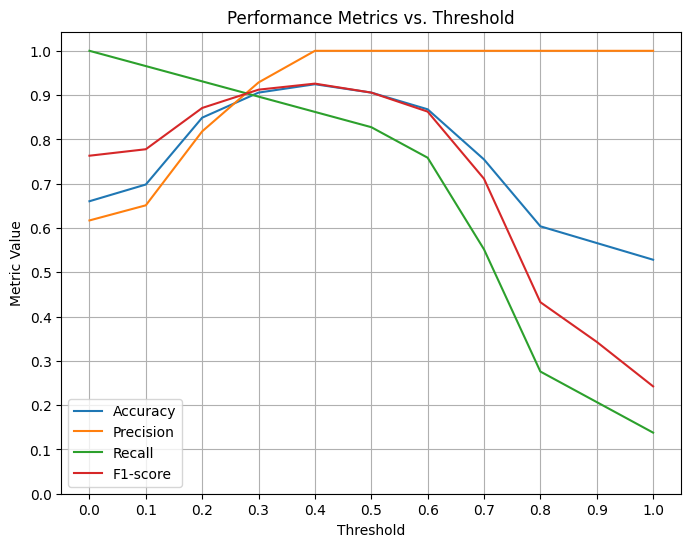

In [247]:
# Valori di soglia da provare
thresholds = np.arange(0, 1.1, 0.1)

# Inizializzazione delle liste per salvare le metriche al variare della soglia
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred_binary))
    precision_scores.append(precision_score(y_test, y_pred_binary))
    recall_scores.append(recall_score(y_test, y_pred_binary))
    f1_scores.append(f1_score(y_test, y_pred_binary))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Performance Metrics vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))  # Imposta gli step di 0.1 sull'asse x
plt.yticks(np.arange(0, 1.1, 0.1))  # Imposta gli step di 0.1 sull'asse y
plt.grid(True)
plt.show()

# Training del modello con Ridge

In [248]:
alphas = [0.1, 1.0, 0.01]  # Lista di valori di alpha da testare
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # Imposta la cross validation a 5

# Addestramento del modello sul training set
ridge_cv.fit(X_train, y_train)

# Predizione sui dati del test set
y_pred = ridge_cv.predict(X_test)

# Valutazione del modello con Ridge

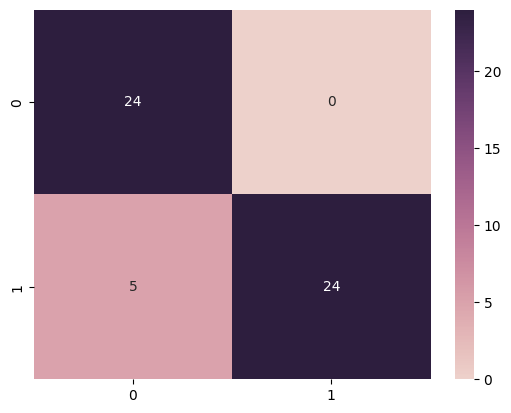

In [249]:
y_pred = ridge_cv.predict(X_test)
mtx=metrics.confusion_matrix(y_test, y_pred.round())
sns.heatmap(mtx.astype(int),annot = True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='0.0f')
plt.show()

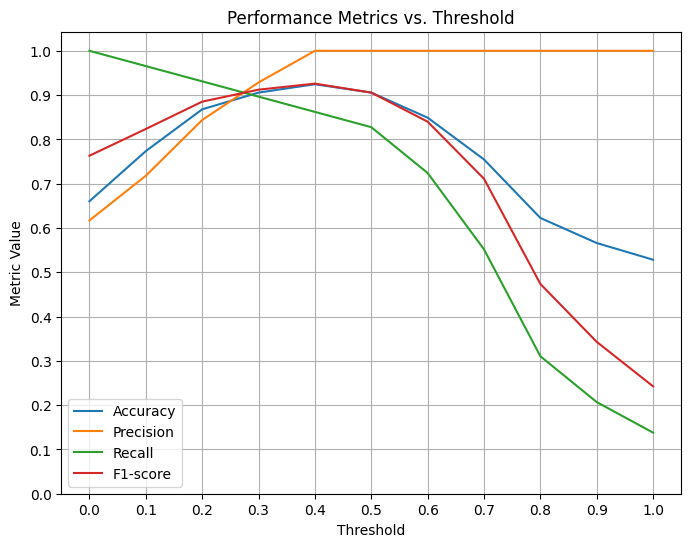

In [250]:
# Valori di soglia da provare
thresholds = np.arange(0, 1.1, 0.1)

# Inizializzazione delle liste per salvare le metriche al variare della soglia
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred_binary))
    precision_scores.append(precision_score(y_test, y_pred_binary))
    recall_scores.append(recall_score(y_test, y_pred_binary))
    f1_scores.append(f1_score(y_test, y_pred_binary))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Performance Metrics vs. Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))  # Imposta gli step di 0.1 sull'asse x
plt.yticks(np.arange(0, 1.1, 0.1))  # Imposta gli step di 0.1 sull'asse y
plt.grid(True)
plt.show()

# Training del modello con Logistic Regression

In [251]:
# Normalizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


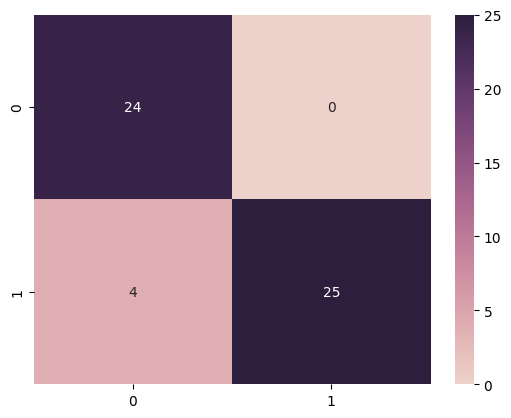

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.86      0.93        29

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.92        53
weighted avg       0.94      0.92      0.92        53

Score =  0.9245283018867925


In [252]:
mtx=confusion_matrix(y_test,y_pred)
sns.heatmap(mtx.astype(int),annot = True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='0.0f')
plt.show()
print(classification_report(y_test,y_pred))
print('Score = ', model.score(X_test_scaled,y_test))

# Training del modello con Decision Trees

In [253]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fai previsioni sul set di test
y_pred = model.predict(X_test)

# Valutazione del modello con Decision Trees

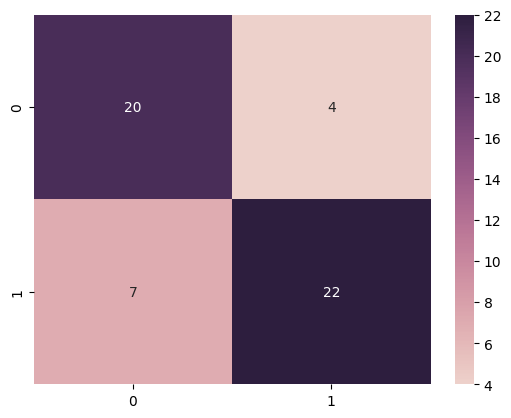

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.85      0.76      0.80        29

    accuracy                           0.79        53
   macro avg       0.79      0.80      0.79        53
weighted avg       0.80      0.79      0.79        53

Score =  0.7924528301886793


In [254]:
mtx=confusion_matrix(y_test,y_pred)
sns.heatmap(mtx.astype(int),annot = True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='0.0f')
plt.show()
print(classification_report(y_test,y_pred))
print('Score = ', model.score(X_test,y_test))

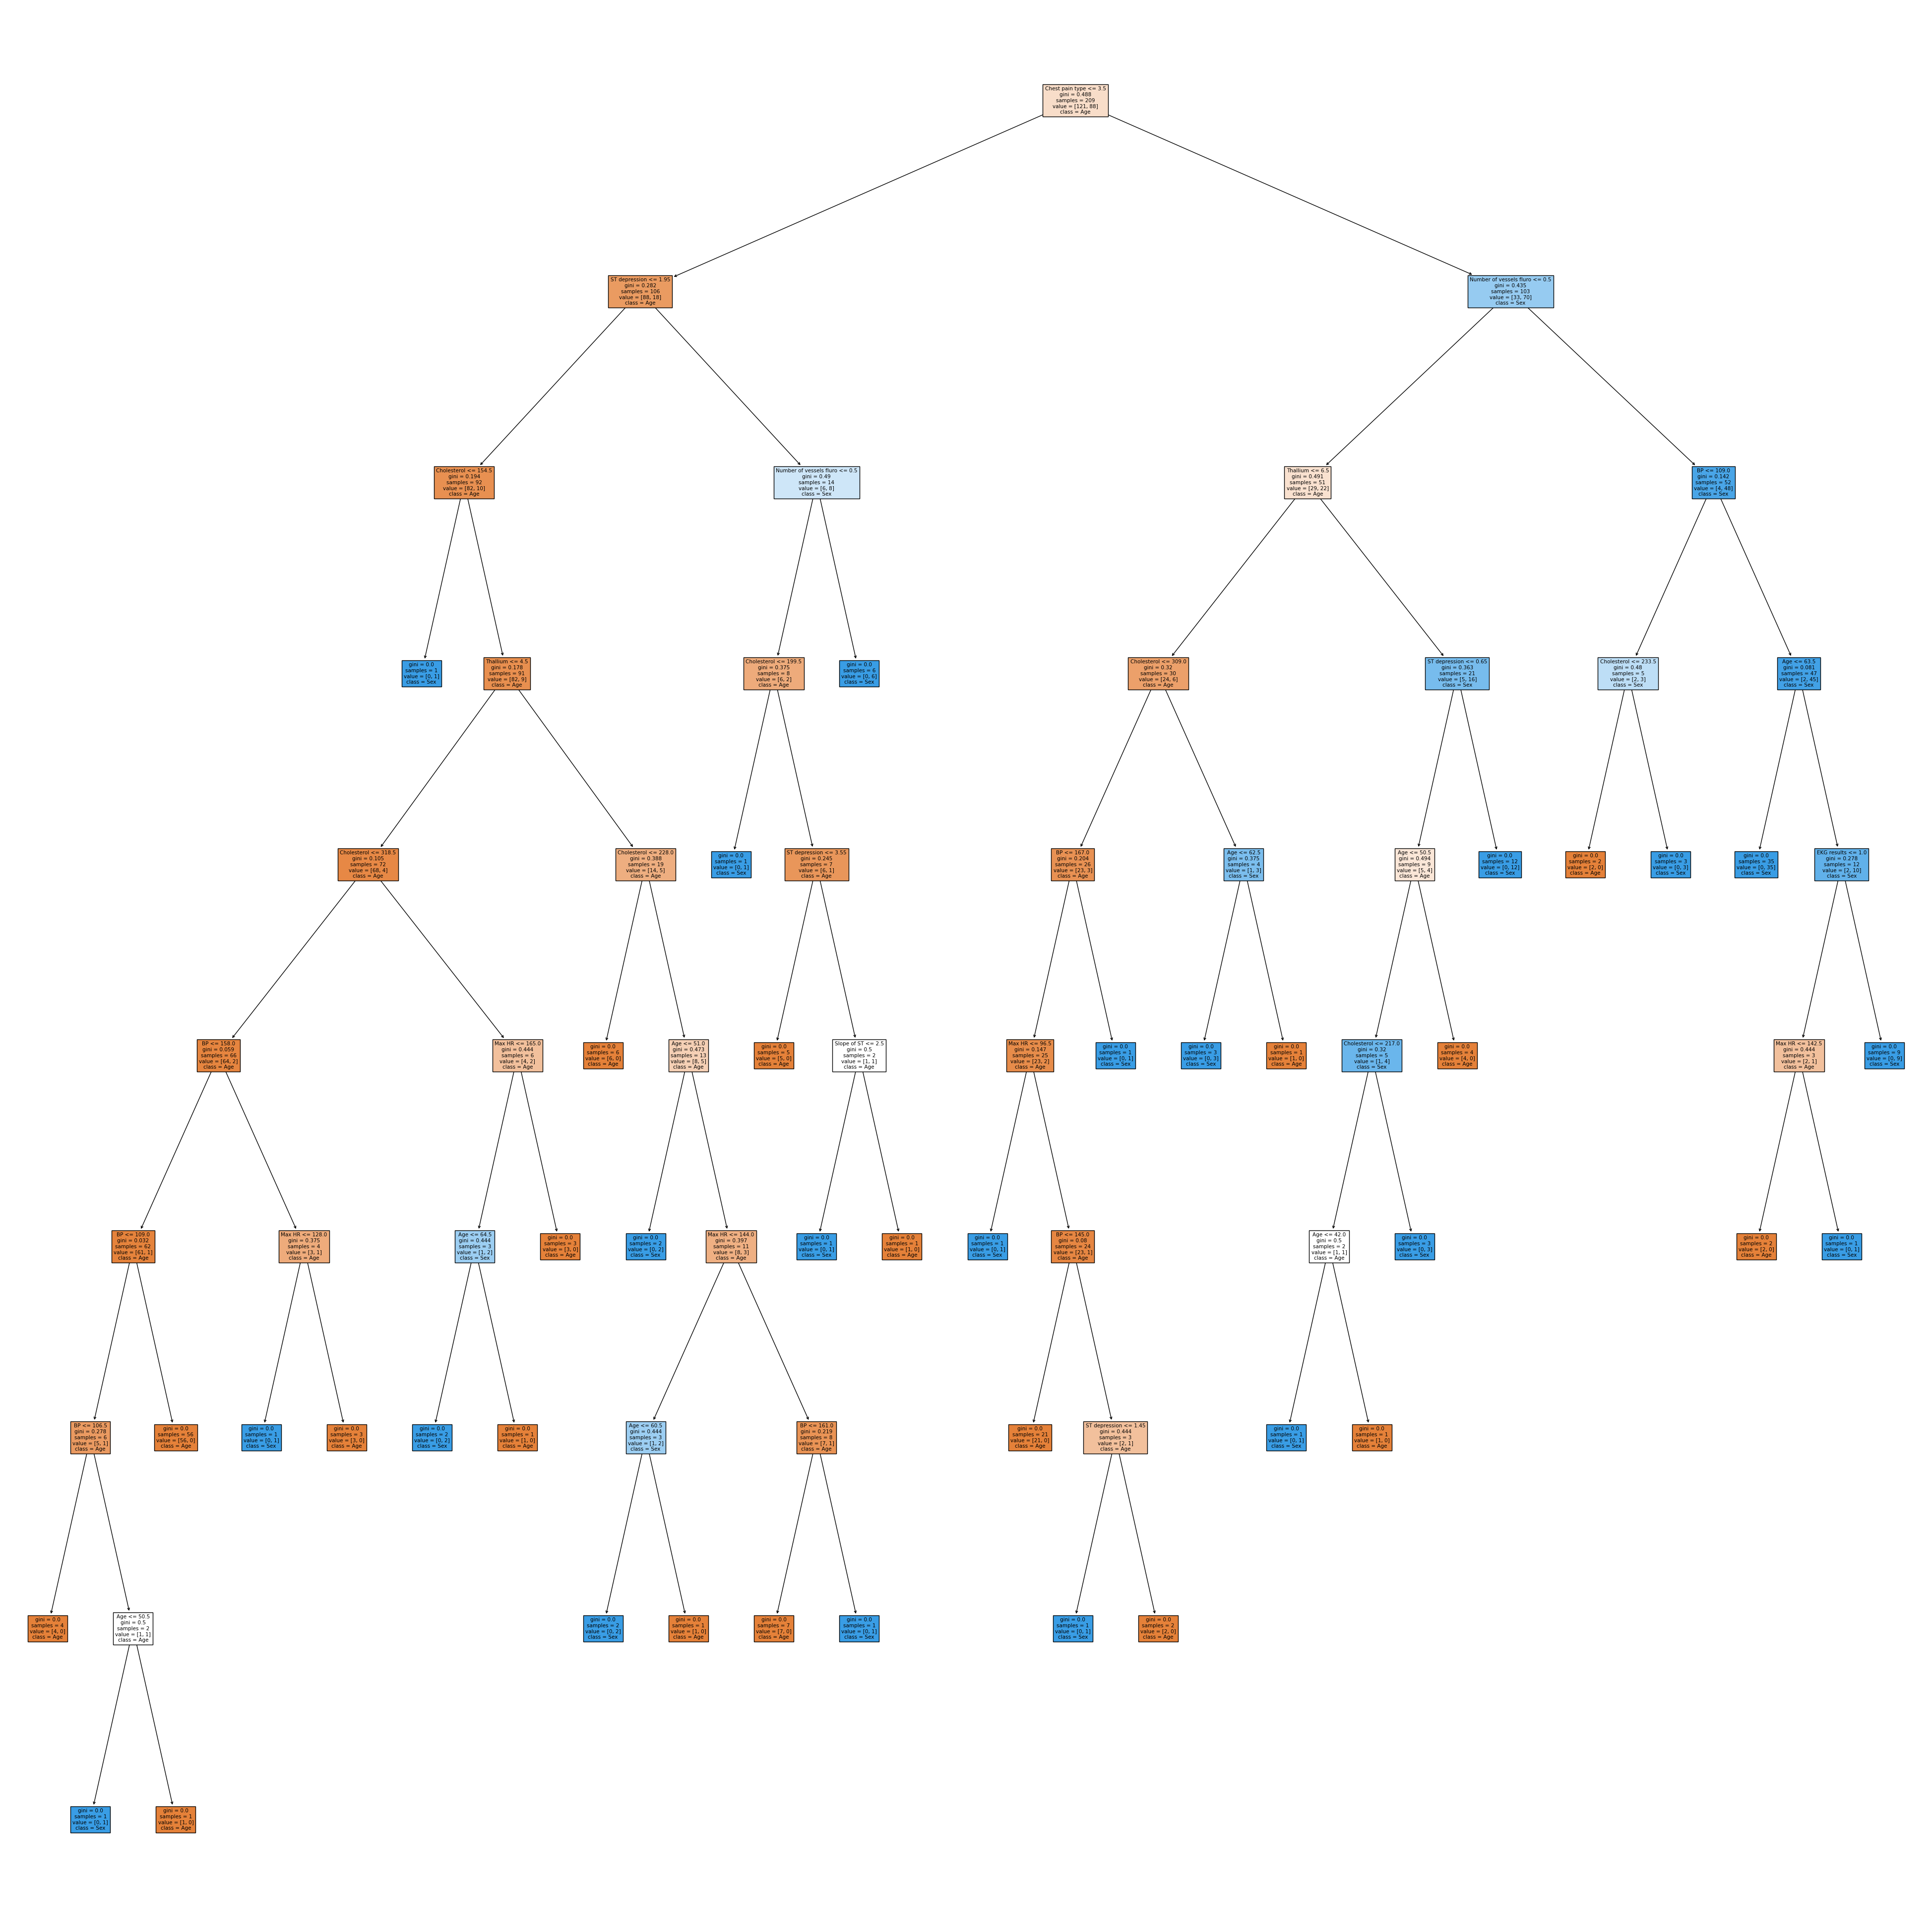

In [255]:
plt.figure(figsize=(50, 50))
plot_tree(model, feature_names=features, class_names=features, filled=True)
plt.show()